In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def hypothesis(w,x_train,b):
    z=np.dot(x_train,w)+b
    #this dot product between values in dataframe and a vector will return a vector(print value to realise
    #however when you do inner product between a vector and dataframe it'll return datafrane)
    #very imp = np.dot(w,x_train will give error because for matrix multiplication column of first 
    #matrix = row of second matrix and if row of first matrix  = column of second matrix then it will throw error)
    hx=1/(1+np.exp(-z))
    return hx

def derivative(w,x_train,b,y_train,m_train):
    #dw,db represents derivative of cost function with respect to w,b respectively
    hx=hypothesis(w,x_train,b)
    dw=(np.dot(x_train.T,hx - y_train))/m_train
    db=np.sum(hx - y_train)/m_train
    return [dw,db]

def cost_func(y_train,x_train,w,b,m_train):
    hx = hypothesis(w,x_train,b) 
    cost=(-1)*((y_train*np.log(hx) + (1-y_train)*np.log(1-hx)).mean())
    #when you are getiing NaN values after more iterations decrease the value of learning rate
    return cost/m_train

def gradient_descent(x_train,y_train,w,b,m_train):
    learning_rate=0.1
    cost_fun_value = cost_func(y_train,x_train,w,b,m_train)
    dw,db=derivative(w,x_train,b,y_train,m_train)
    w-=learning_rate*dw
    b-=learning_rate*db
    return [cost_fun_value,w,b]   

def predict(x_test,w,b,threshold=0.5):
    hx=hypothesis(w,x_test,b)
    final=(hx>= threshold)
    return (final)
        

In [3]:
dataset=load_breast_cancer()
columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness',
         'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 
         'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error','fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness','worst compactness', 'worst concavity', 
         'worst concave points','worst symmetry', 'worst fractal dimension']
data=dataset.data
#normalisation/feature scaling
#feature scaling doesn't effect the output. you will get same correlation matrix before and after normalisation 
mean=data.mean()
std=data.std()
data=(data-mean)/std
df=pd.DataFrame(data,columns=columns)
y=dataset.target
df['target'] = y

In [4]:
#to check if data has null values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


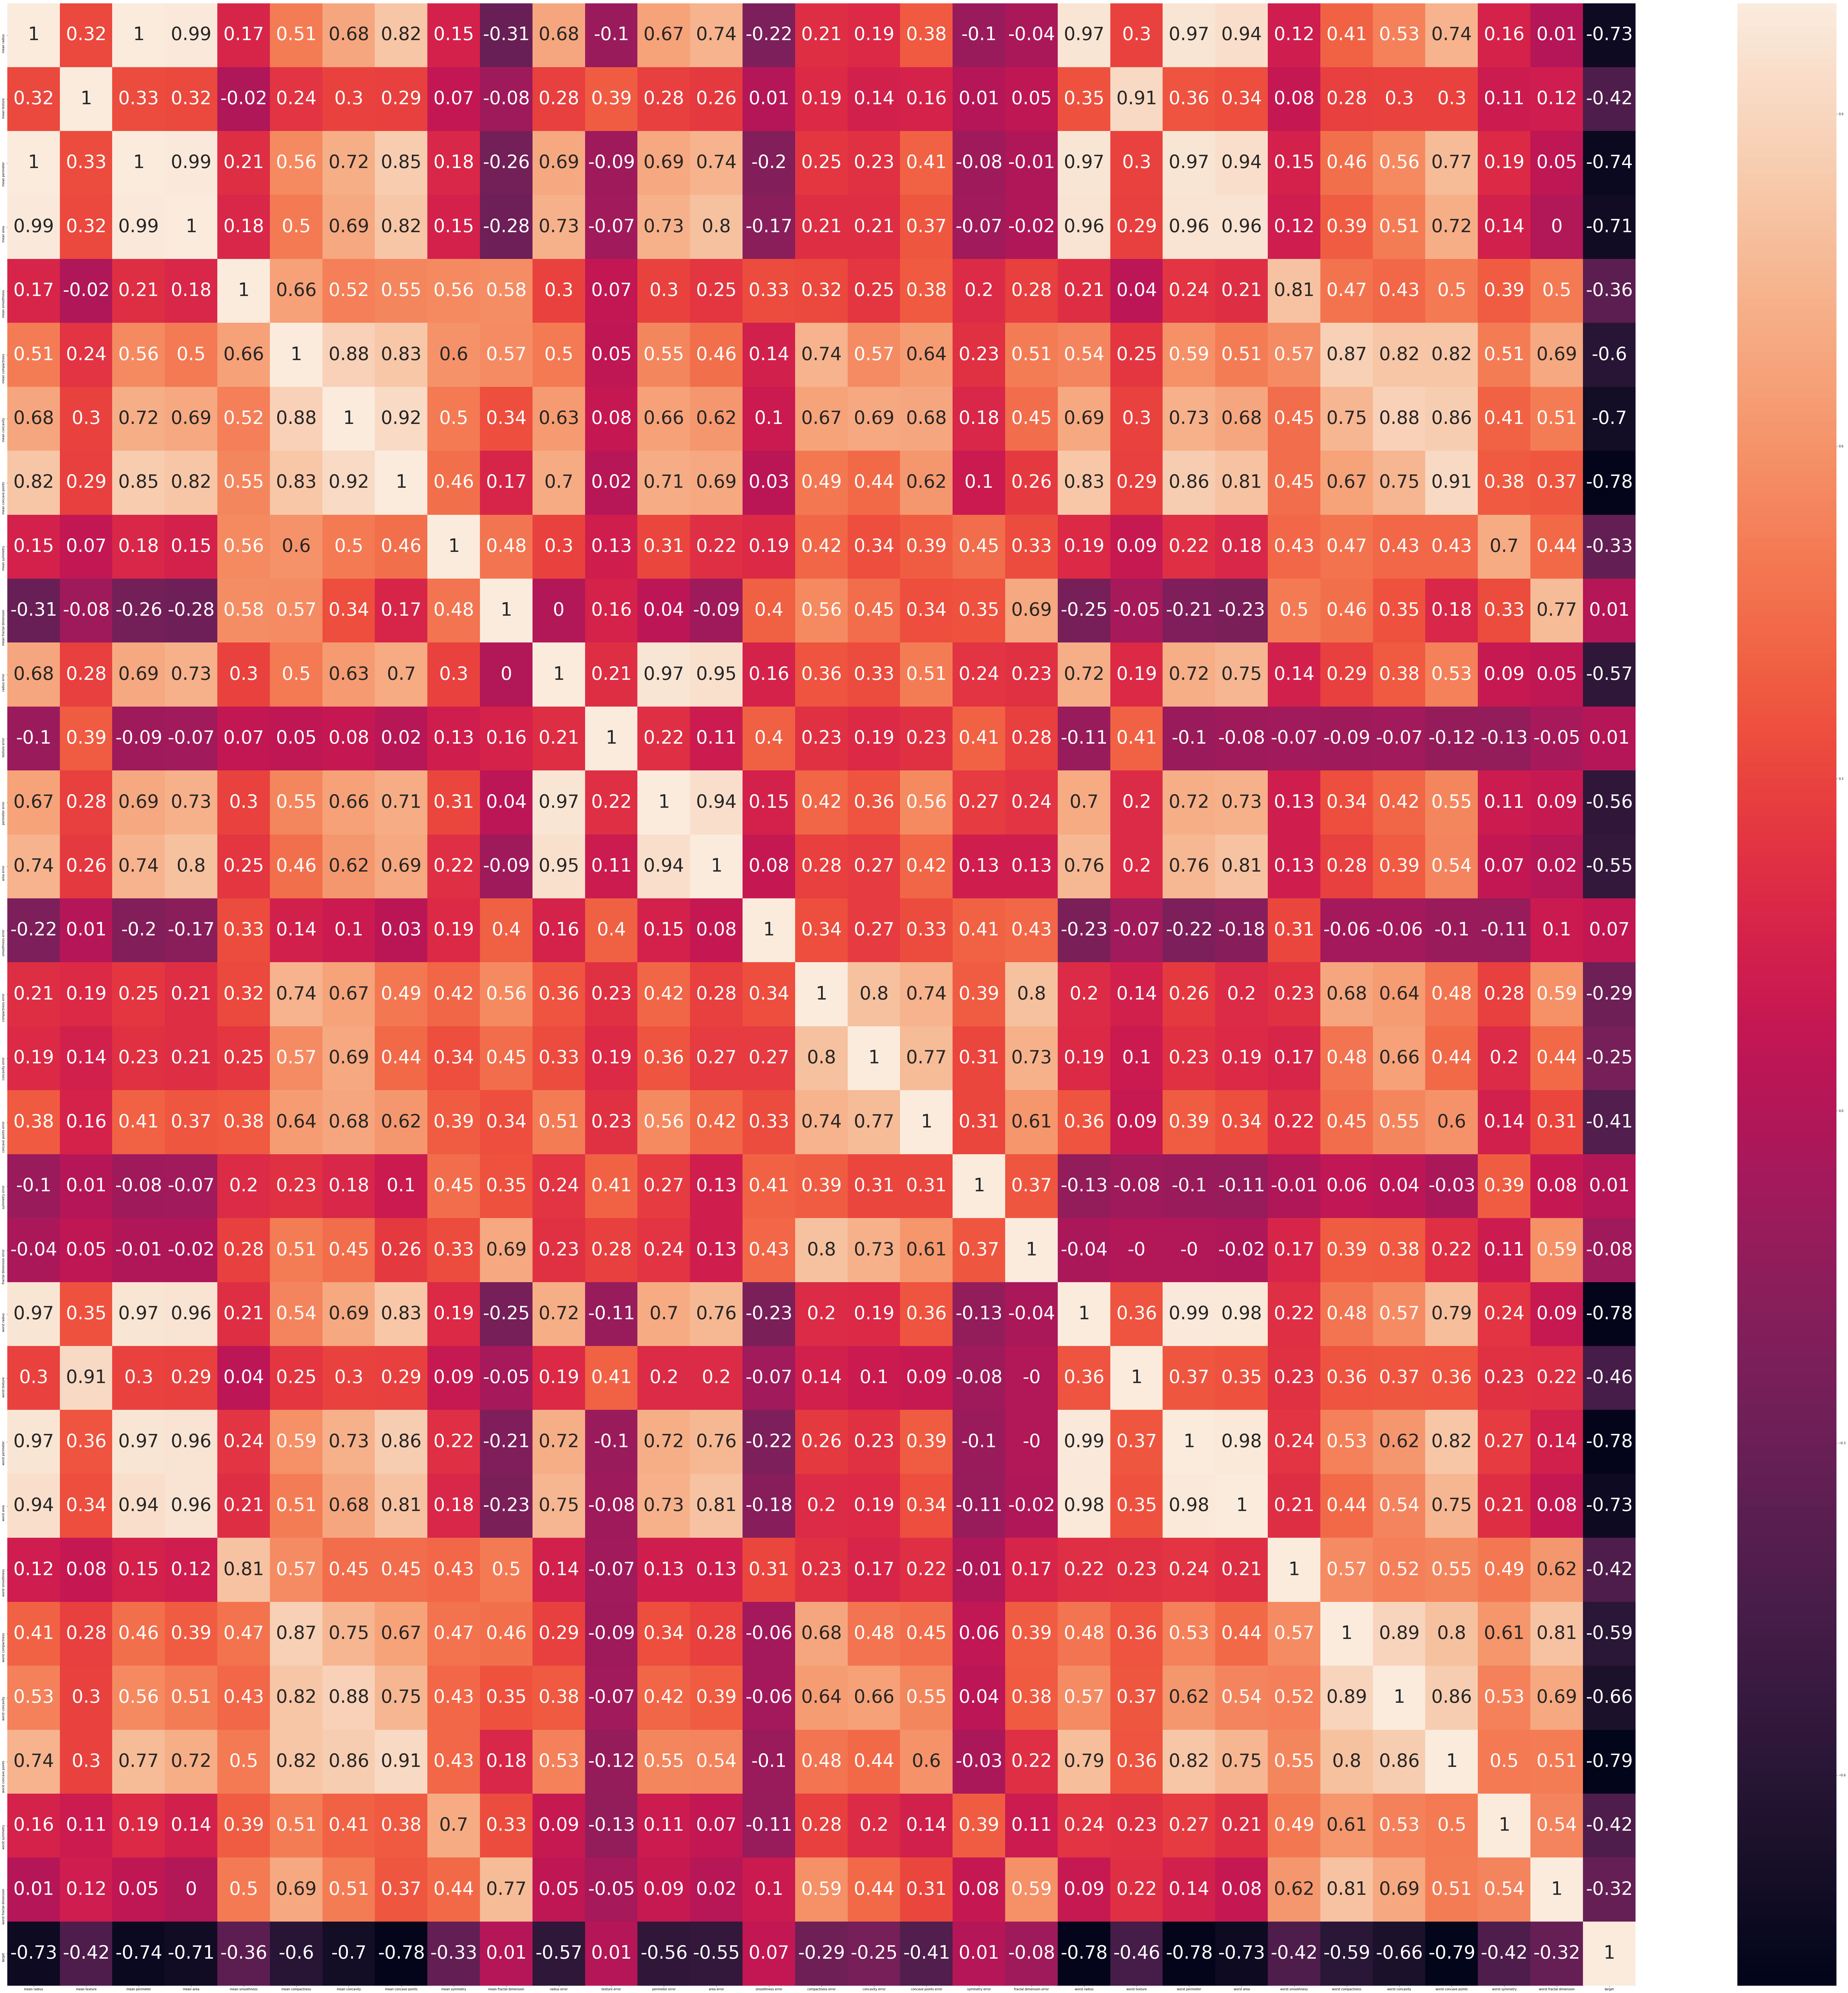

In [13]:
plt.figure(figsize=[120,120]) 
# play with the figsize until the plot is big enough to plot all the columns
corr=df.corr().round(2)
sns.heatmap(corr, annot= True, annot_kws={"size": 60})
#annot_kws parameter is used to set size of font
plt.show()

In [6]:
#only selecting features that have high correlation with the target variable
features=['mean radius','mean perimeter', 'mean area','mean concavity','mean concave points','smoothness error',
          'worst texture','worst area', 'worst smoothness','worst concave points','worst symmetry']
x=pd.DataFrame(np.c_[df['mean radius'],df['mean perimeter'], df['mean area'],df['mean concavity'],
                     df['mean concave points'],df['smoothness error'],df['worst texture'],df['worst area'],
                     df['worst smoothness'],df['worst concave points'],df['worst symmetry']])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
m_train = x_train.shape[0]
m_test = x_test.shape[0]
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))
#this is a very very important step. without this step you will never get correct output because y_train is 
#a rank 1 array

In [8]:
#random initialisation of parameters
#initialising weight vector
w=np.random.random((11,1))
#initialising base
b=np.random.random()

In [9]:
loss = []
for i in range(500):
    cost_fun_value,w,b=gradient_descent(x_train,y_train,w,b,m_train)
    loss.append(cost_fun_value)

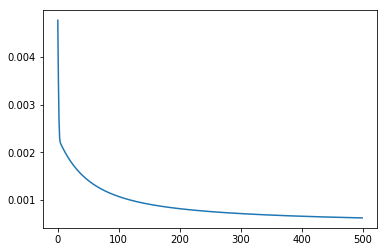

In [10]:
plt.plot(loss)
plt.show()

In [11]:
y_pred=predict(x_test,w,b,threshold=0.5)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("ACCURACY :",((cm[0][0]+cm[1][1])/np.sum(cm)) )
#try different values of learning rate ,no of iterations for correct acuracy
#learning rate= 0.0001 gave 0.63 accuracy
#learning rate=0.1 gave 0.941 while keeping learning rate same and changing no of iteration gave different accuracy

[[ 56   7]
 [  1 107]]
ACCURACY : 0.9532163742690059
